## <div style="text-align: center">Machine Learning on Kannada MNIST  </div>

<img src="https://storage.googleapis.com/kaggle-media/competitions/Kannada-MNIST/kannada.png">
Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script. 

</div>


-------------------------------------------------------------

 **I hope this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 

<a id="top"></a> <br>
## Notebook  Content

1. [Scikit-learn and Keras](#1)
1. [Import](#2)
1. [Estimator](#3)
1. [Load Data](#4)
1. [Prepare Train and Test](#5)
1. [Visualization](#6)
1. [Machine Learning Algorithms](#7)
    1. [Logistic Regression](#10)
    1. [Decision Tree](#11)
    1. [PCA ams SVM](#12)
    1. [XGBOOST](#13)
    1. [AdaBoost classifier](#14)
1. [Submit](#15)

<a id="1"></a> <br>
## 1-Scikit-learn

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

<div style="text-align:center">Website: http://scikit-learn.org</div>



<a id="2"></a> <br>
## 2- Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
import os

<a id="3"></a> <br>
## 3- Estimator for ML

Given a scikit-learn estimator object named **model**, the following methods are available:

#### Available in all Estimators

**model.fit()** : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

---------------------------------------------------------

#### Available in supervised estimators

**model.predict()** : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

**model.predict_proba()** : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
**model.score()** : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

---------------------------------------------------------
#### Available in unsupervised estimators

**model.predict()** : predict labels in clustering algorithms.
**model.transform()** : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
**model.fit_transform()** : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

<a id="4"></a> <br>
## 4- Load Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/train.csv


In [3]:
print('Total File sizes')
print('-'*10)
for f in os.listdir('../input/Kannada-MNIST'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../input/Kannada-MNIST/' + f) / 1000000, 2)) + 'MB')

Total File sizes
----------
Dig-MNIST.csv                 18.4MB
sample_submission.csv         0.03MB
test.csv                      8.67MB
train.csv                     104.75MB


In [4]:
train = pd.read_csv('../input/Kannada-MNIST/train.csv')
test = pd.read_csv('../input/Kannada-MNIST/test.csv')
submission = pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')
val= pd.read_csv('../input/Kannada-MNIST/Dig-MNIST.csv')

In [5]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.rename(columns={'id':'label'}, inplace=True)
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print('Train Shape: ', train.shape)
print('Test Shape:',test.shape)
print('Submission Shape: ',submission.shape)
print('Validation Shape: ',val.shape)

Train Shape:  (60000, 785)
Test Shape: (5000, 785)
Submission Shape:  (5000, 2)
Validation Shape:  (10240, 785)


In [9]:
train.groupby(by='label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

<a id="5"></a> <br>
## 5- Prepare Train and Test

scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

- Training set for fitting the model
- Test set for evaluation only

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size=0.2)

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
44281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="6"></a> <br>
## 6- Visualization
 some graphical representation of information and data.

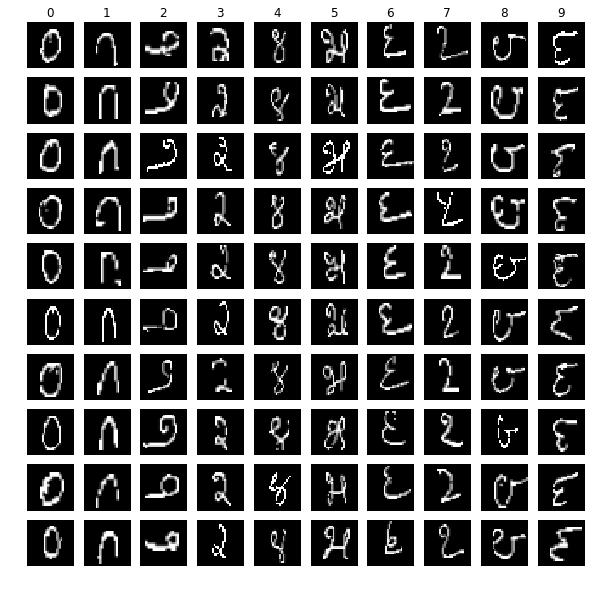

In [13]:
# Visualization Reference Kernel https://www.kaggle.com/josephvm/kannada-with-pytorch
# Some quick data visualization 
# First 10 images of each class in the training set

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

# I know these for loops look weird, but this way num_i is only computed once for each class
for i in range(10): # Column by column
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10): # Row by row
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

<a id="7"></a> <br>
## 7- Machine Learning Algorithm


<a id="10"></a> <br>
## 7.1 Logistic Regression

Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

In [14]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
ModelLR = LogisticRegression(C=5, solver='lbfgs', multi_class='multinomial')
ModelLR.fit(X_train, y_train)

y_predLR = ModelLR.predict(X_test)

# Accuracy score
print('accuracy is',accuracy_score(y_predLR,y_test))

score = accuracy_score(y_predLR,y_test)

accuracy is 0.96125


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [15]:
cm = confusion_matrix(y_test, y_predLR)
print(cm)

[[1195   30    8    7    2    1    0    5    7    4]
 [  11 1193    0    3    0    0    0    1    0    1]
 [   5    1 1227    1    0    4    0    0    1    0]
 [   4    1    4 1149   11    8    3   22    0    3]
 [   2    0    0    6 1128   10    2    1    7   11]
 [   0    3    3    9   15 1147    3    0    5    1]
 [   1    1    0    6    4    0 1118   58    1    8]
 [   2    0    0   30    2    2   54 1063    1    6]
 [  10    1    1    4    3    2    0    0 1153    7]
 [   3    0    0    2   13    1    6    1    9 1162]]


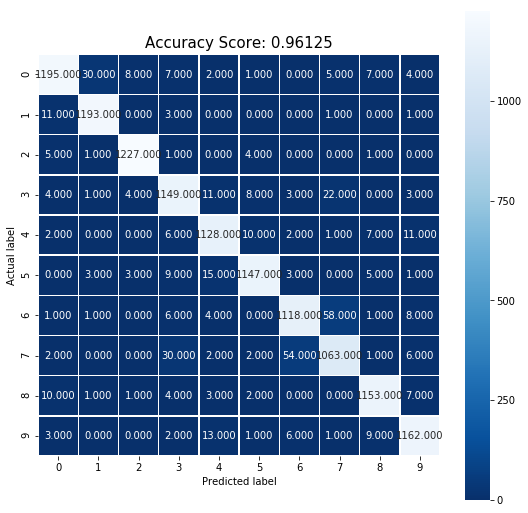

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<a id="11"></a> <br>
## 7.2 Decision Tree 



In [17]:
# Seed for reproducability
seed = 1234
np.random.seed(seed)

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

DT = DecisionTreeClassifier(max_depth=10, random_state=seed)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [19]:
y_predDT = DT.predict(X_test)

# Accuracy score
print('accuracy DT',accuracy_score(y_predDT,y_test))

scoreDT= accuracy_score(y_predDT,y_test)

accuracy DT 0.8569166666666667


In [20]:
DTm =confusion_matrix(y_test, y_predDT)
print(DTm)

[[1131   37    4   21    2    2   19    7   26   10]
 [   3 1135    0    8    1    7    1    0   50    4]
 [  12    2 1108   49    1   28   16   10   11    2]
 [  17    2    5  998   23   40   47   50   16    7]
 [   6    3    0   81  948   60    8   15   29   17]
 [   0    6    4  107   32  972    3   13   39   10]
 [   9    1    2   43    0   13 1023   67   38    1]
 [  14    2    0   85   14   12  114  894   16    9]
 [  14    2    0   24    9    8    1    7 1099   17]
 [  14    2    1   80   26   19   15    2   63  975]]


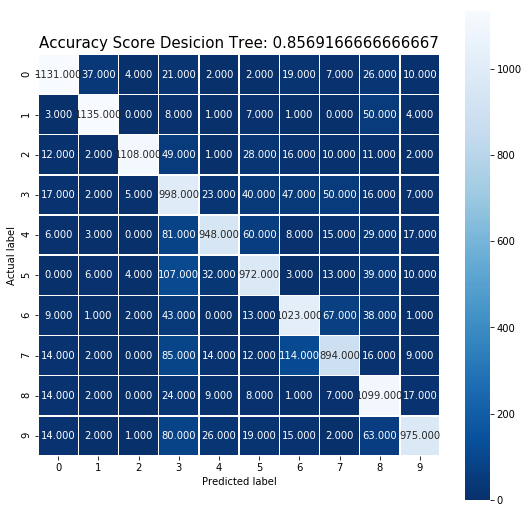

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(DTm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Desicion Tree: {0}'.format(scoreDT)
plt.title(all_sample_title, size = 15);

<a id="12"></a> <br>
## 7.3 PCA svm

In [22]:
from sklearn import svm
from sklearn.decomposition import PCA


In [23]:
pca = PCA(n_components=0.7,whiten=True)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)


In [24]:
sv = svm.SVC(kernel='rbf',C=9)
sv.fit(X_train_PCA , y_train)



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
y_predsv = sv.predict(X_test_PCA)

In [26]:
print('accuracy is',accuracy_score(y_predsv,y_test))

scoreclf= accuracy_score(y_predsv,y_test)

accuracy is 0.99075


<a id="13"></a> <br>
## 7.4 XGBOOST

In [27]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-merror:0.224583
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.191333
[2]	validation_0-merror:0.173167
[3]	validation_0-merror:0.160583
[4]	validation_0-merror:0.146333
[5]	validation_0-merror:0.142583
[6]	validation_0-merror:0.1365
[7]	validation_0-merror:0.130167
[8]	validation_0-merror:0.126333
[9]	validation_0-merror:0.120917
[10]	validation_0-merror:0.116583
[11]	validation_0-merror:0.111917
[12]	validation_0-merror:0.108583
[13]	validation_0-merror:0.105417
[14]	validation_0-merror:0.101833
[15]	validation_0-merror:0.09875
[16]	validation_0-merror:0.0965
[17]	validation_0-merror:0.094083
[18]	validation_0-merror:0.092167
[19]	validation_0-merror:0.0895
[20]	validation_0-merror:0.087583
[21]	validation_0-merror:0.086
[22]	validation_0-merror:0.08375
[23]	validation_0-merror:0.08275
[24]	validation_0-merror:0.080583
[25]	validation_0-merror:0.08075
[26]	validation_0-merror:0.078417
[27]	validation_0-merror:0.07775
[28]	v

In [28]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy XGBOOST: 96.21%


<a id="14"></a> <br>
## 7.5 AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)
y_predAda=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_predAda))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predAda,y_test))

AdaB = accuracy_score(y_predAda,y_test)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1259
           1       0.88      0.92      0.90      1209
           2       0.97      0.97      0.97      1239
           3       0.71      0.83      0.77      1205
           4       0.81      0.81      0.81      1167
           5       0.84      0.87      0.86      1186
           6       0.76      0.79      0.77      1197
           7       0.62      0.47      0.54      1160
           8       0.90      0.91      0.90      1181
           9       0.90      0.88      0.89      1197

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.83     12000
weighted avg       0.83      0.83      0.83     12000

[[1196    3   11    9    1    0    1    1    7    2]
 [  38 1197    1    1    0    2    1    2    0    0]
 [   0    0 1220    0    0    2    1    0    0    0]
 [   9    0    4 1150    6    8    6   36    2    0]
 [   3    1    2    8 1143   

## SCORES 

In [30]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','Decision Tree', 'PCA', 'XGBOOST', "AdaBoost classifier"
              ],
    'Score': [score,scoreDT,scoreclf,accuracy,AdaB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,PCA,0.990750
3,XGBOOST,0.962083
0,LogisticRegression,0.961250
1,Decision Tree,0.856917
4,AdaBoost classifier,0.833250


Text(0, 0.5, 'Algorithm')

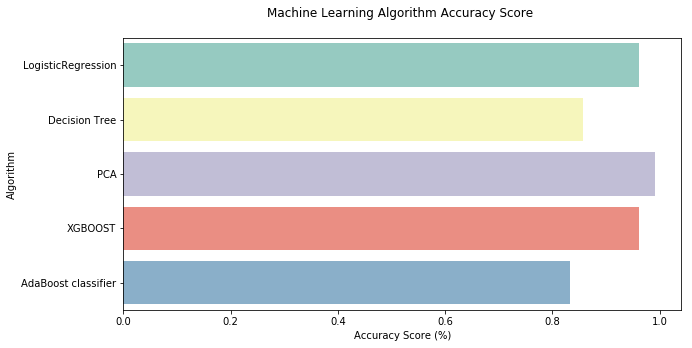

In [31]:
plt.subplots(figsize =(10, 5))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

<a id="15"></a> <br>
## 15- Submit Prediction

In [32]:
test_x = test.values[:,1:]
test_x = pca.transform(test_x)

In [33]:
preds = sv.predict(test_x)


In [34]:
submission['label'] = preds
submission.to_csv('submission.csv', index=False)

In [35]:
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


[Go to top](#top)


 **I hope this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 